# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city_name = []
lat =[]
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

count = 1 
setCount = 1
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        city_name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        print(f"Processing Record of {count} Set {setCount} | {city}")
        
        if count == 50:
            count = 1
            setCount += 1
        else:
            count += 1
        
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record of 1 Set 1 | nikolskoye
Processing Record of 2 Set 1 | kapaa
Processing Record of 3 Set 1 | zhuhai
Processing Record of 4 Set 1 | busselton
Processing Record of 5 Set 1 | severo-kurilsk
Processing Record of 6 Set 1 | taoudenni
Processing Record of 7 Set 1 | albany
Processing Record of 8 Set 1 | rikitea
Processing Record of 9 Set 1 | butaritari
Processing Record of 10 Set 1 | yulara
Processing Record of 11 Set 1 | basco
Processing Record of 12 Set 1 | barrow
Processing Record of 13 Set 1 | ribeira grande
Processing Record of 14 Set 1 | kutum
Processing Record of 15 Set 1 | isangel
Processing Record of 16 Set 1 | haines junction
Processing Record of 17 Set 1 | acoua
Processing Record of 18 Set 1 | te anau
Processing Record of 19 Set 1 | batagay
Processing Record of 20 Set 1 | kattivakkam
Processing Record of 21 Set 1 | cairns
Processing Record of 22 Set 1 | ushuaia
Processing Record of 23 Set 1 | saint-pierre
Proces

City not found. Skipping...
Processing Record of 39 Set 4 | ambovombe
Processing Record of 40 Set 4 | westport
Processing Record of 41 Set 4 | klaksvik
Processing Record of 42 Set 4 | mount isa
Processing Record of 43 Set 4 | stans
Processing Record of 44 Set 4 | eenhana
Processing Record of 45 Set 4 | naze
Processing Record of 46 Set 4 | kidodi
Processing Record of 47 Set 4 | bereda
Processing Record of 48 Set 4 | south lake tahoe
Processing Record of 49 Set 4 | santa isabel do rio negro
Processing Record of 50 Set 4 | kilindoni
Processing Record of 1 Set 5 | chara
Processing Record of 2 Set 5 | tarabuco
Processing Record of 3 Set 5 | saldanha
Processing Record of 4 Set 5 | singaraja
Processing Record of 5 Set 5 | baherden
City not found. Skipping...
Processing Record of 6 Set 5 | dikson
Processing Record of 7 Set 5 | sorland
Processing Record of 8 Set 5 | victoria
Processing Record of 9 Set 5 | vieste
Processing Record of 10 Set 5 | praya
Processing Record of 11 Set 5 | auki
Processi

Processing Record of 27 Set 8 | lisieux
Processing Record of 28 Set 8 | cairo
Processing Record of 29 Set 8 | chicama
Processing Record of 30 Set 8 | pochutla
City not found. Skipping...
Processing Record of 31 Set 8 | neiafu
Processing Record of 32 Set 8 | petrolia
Processing Record of 33 Set 8 | ambilobe
Processing Record of 34 Set 8 | flin flon
Processing Record of 35 Set 8 | manzanillo
Processing Record of 36 Set 8 | martapura
Processing Record of 37 Set 8 | enshi
Processing Record of 38 Set 8 | deputatskiy
Processing Record of 39 Set 8 | shimoda
Processing Record of 40 Set 8 | sharjah
Processing Record of 41 Set 8 | bubaque
Processing Record of 42 Set 8 | lake havasu city
Processing Record of 43 Set 8 | santana do mundau
Processing Record of 44 Set 8 | sabang
Processing Record of 45 Set 8 | guaranda
Processing Record of 46 Set 8 | portland
Processing Record of 47 Set 8 | atar
Processing Record of 48 Set 8 | caravelas
Processing Record of 49 Set 8 | husavik
Processing Record of 50 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,17.11,96,87,1.63,RU,1657396788
1,Kapaa,22.0752,-159.3190,26.99,87,100,2.68,US,1657396788
2,Zhuhai,22.2769,113.5678,29.36,94,40,3.09,CN,1657396788
3,Busselton,-33.6500,115.3333,13.33,59,92,8.04,AU,1657396788
4,Severo-Kuril'sk,50.6789,156.1250,13.43,88,100,4.85,RU,1657396788


In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.008102,17.954156,21.044908,69.687500,53.196691,3.761875,1.657397e+09
std,33.453532,91.778578,8.379593,22.210481,40.274563,2.434098,8.198308e+01
min,-54.800000,-175.200000,-2.190000,1.000000,0.000000,0.000000,1.657396e+09
25%,-8.569650,-62.453475,14.825000,59.000000,9.000000,1.805000,1.657397e+09
50%,21.443950,21.526100,22.395000,76.000000,56.500000,3.265000,1.657397e+09
75%,46.666650,104.193450,27.002500,86.250000,99.000000,5.140000,1.657397e+09
max,78.218600,178.416700,43.030000,100.000000,100.000000,13.910000,1.657397e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humid_gt100 = city_data.loc[city_data["Humidity"] > 100]
humid_gt100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
index = humid_gt100.index
print(index)

Int64Index([], dtype='int64')


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,17.11,96,87,1.63,RU,1657396788
1,Kapaa,22.0752,-159.3190,26.99,87,100,2.68,US,1657396788
2,Zhuhai,22.2769,113.5678,29.36,94,40,3.09,CN,1657396788
3,Busselton,-33.6500,115.3333,13.33,59,92,8.04,AU,1657396788
4,Severo-Kuril'sk,50.6789,156.1250,13.43,88,100,4.85,RU,1657396788


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

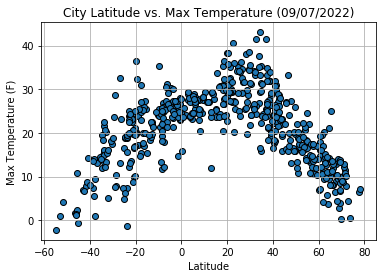

In [49]:
today = date.today().strftime('%d/%m/%Y')
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], edgecolors = "black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig(r'Output/Latitude vs. Temperature.png')

The plot above is analysing the relationship between temperature and latitude around the globe. The plot shows that there are higher temperatures the closer you get to the equator (where latitude is 0). The further away from the equator, the colder the temperatures.

## Latitude vs. Humidity Plot

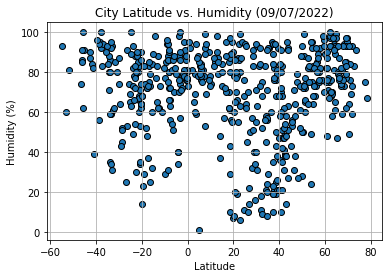

In [50]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], edgecolors = "black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig(r'Output/Latitude vs. Humidity.png')

The scatter chart above is illustrating the relationship between the latitude and humidity of a city. As the chart shows, there is no conclusive relationship between the two.

## Latitude vs. Cloudiness Plot

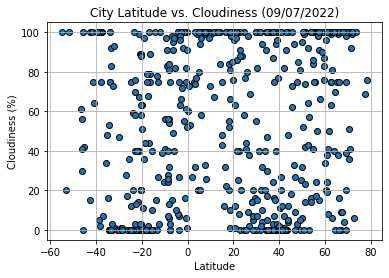

In [51]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], edgecolors = "black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig(r'Output/Latitude vs. Cloudiness.png')

The plot above is analysing whether there is a relationship between the latitude of a city and how cloudy it is. Similar to the previous chart, there is no conclusive relationship between these two variables.

## Latitude vs. Wind Speed Plot

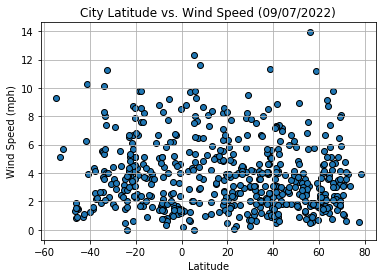

In [52]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], edgecolors = "black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig(r'Output/Latitude vs. Wind Speed.png')

The scatter plot above is analysing whether there is a relationship between the latitude of a city and the average wind speed. Similar to the previous charts, there is no conclusive relationship between these two variables.

## Linear Regression

In [21]:
north_hem = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5379441772361704.


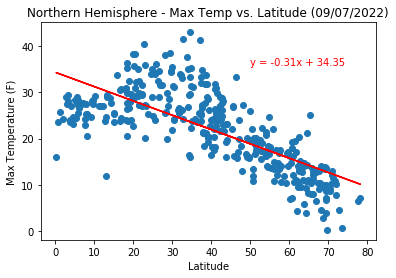

In [53]:
nlat = north_hem["Lat"]
ntemp = north_hem["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(nlat, ntemp)
fit = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat, ntemp)
plt.plot(nlat, fit, "r-")

plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.annotate(line_eq,(50,36), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Northern Hemisphere - Max Temp vs. Latitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.517957684301115.


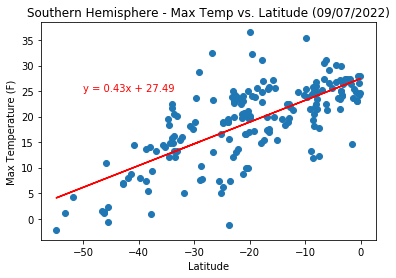

In [54]:
slat = south_hem["Lat"]
stemp = south_hem["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(slat, stemp)
fit = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat, stemp)
plt.plot(slat, fit, "r-")

plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.annotate(line_eq,(-50,25), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Southern Hemisphere - Max Temp vs. Latitude.png')

The pair of scatter plots above are modeling the relationship between the maximum temperature and the latitude, in the southern and northern hemispheres. It can be seen that in the northern hemisphere there is a negative correlation between latitude and temperature, while in ther southern hemisphere there is a negative correlation, i.e. the further away from the equator (where latitude is 0), the temperature decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01533989933798484.


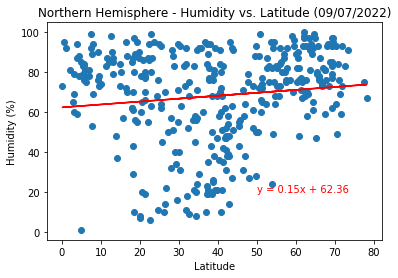

In [55]:
nhumid = north_hem["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(nlat, nhumid)
fit = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat, nhumid)
plt.plot(nlat, fit, "r-")

plt.title(f"Northern Hemisphere - Humidity vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(50,20), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Northern Hemisphere - Humidity vs. Latitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0009791388420105163.


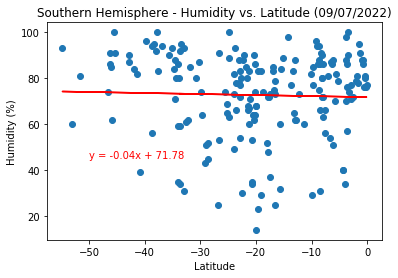

In [56]:
shumid = south_hem["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(slat, shumid)
fit = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat, shumid)
plt.plot(slat, fit, "r-")

plt.title(f"Southern Hemisphere - Humidity vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-50,45), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Southern Hemisphere - Humidity vs. Latitude.png')

As you can see in the charts above, there is a slight positive correlation between latitude and humidity in the northern hemisphere, and a slight negative correlation between latitude and humidity in the southern hemisphere. This implies the closer to the equator, the less humidity there is. However, as the r-values for both regressions are very low, it can be said there is little to no correlation between these variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0001761704827827823.


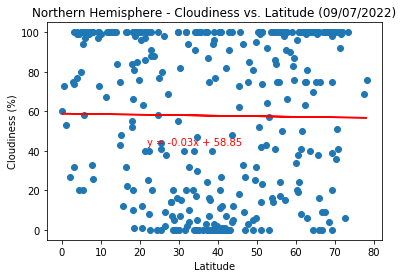

In [57]:
ncloud = north_hem["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(nlat, ncloud)
fit = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat, ncloud)
plt.plot(nlat, fit, "r-")

plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.annotate(line_eq,(22,43), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Northern Hemisphere - Cloudiness vs. Latitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.011450159971240575.


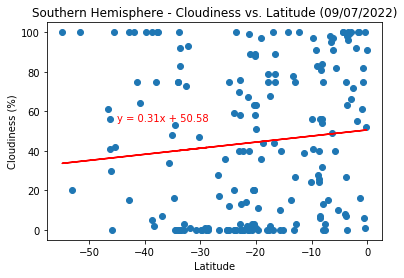

In [58]:
scloud = south_hem["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(slat, scloud)
fit = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat, scloud)
plt.plot(slat, fit, "r-")

plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.annotate(line_eq,(-45,55), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Southern Hemisphere - Cloudiness vs. Latitude.png')

It can be concluded from the charts above that cloudiness increases the closer to the equator you get. However, the r-values are very low and so there is little to no correlation between these variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.025168393387350062.


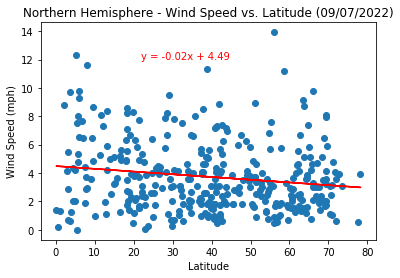

In [59]:
nwind = north_hem["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(nlat, nwind)
fit = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat, nwind)
plt.plot(nlat, fit, "r-")

plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(22,12), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Northern Hemisphere - Wind Speed vs. Latitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007251729649291833.


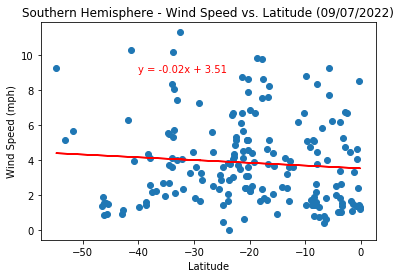

In [60]:
swind = south_hem["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(slat, swind)
fit = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat, swind)
plt.plot(slat, fit, "r-")

plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(-40,9), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.savefig(r'Output/Southern Hemisphere - Wind Speed vs. Latitude.png')

The pair of scatter plots above are illustrating the relationship between latitude and wind speed in both the northern and southern hemispheres. In both cases there is a very slight negative correlation, implying the further north you get the wind speed reduces. However, as seen in the previous cases, the r-values are too low to conclude a relationship between these variables.

In [48]:
clean_city_data.index.rename('City_ID', inplace=True)
clean_city_data.to_csv(r'Output/cities.csv', encoding='utf-8', index=True)